In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from urbanstats.mapper.ramp import get_all_ramps, plot_ramp

In [4]:
import tqdm.auto as tqdm
import pycountry
import pandas as pd
import requests

from permacache import permacache

from urbanstats.osm.query import query_to_geopandas
from urbanstats.osm.to_geopandas import *

/home/kavi/anaconda3/envs/urbanstats-310/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [5]:
template = """
[bbox:-90, -180, 90, 180];
relation["ISO3166-2"~"^%s.*"];
out body;
>;
out skel qt;
"""

In [8]:
# import overpy

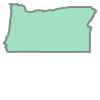

In [7]:
query_to_geopandas(template % "US-OR(.)?").geometry.iloc[0]

In [9]:
# query = template % "US-OR"
# api = overpy.Overpass()
# result = api.query(query)

In [88]:
# [oregon] = [x for x in result.relations if "name" in x.tags]

In [89]:
# outer_ways = [x for x in oregon.members if x.role == "outer"]

In [131]:
# import shapely.geometry as geometry
# from shapely.ops import linemerge, unary_union, polygonize
# from shapely.geometry import Point, Polygon, LineString


In [132]:

# # def polygon_for_relation(relation):
# #     members = {"inner": [], "outer": []}
# #     queue = relation.members[:]
# #     while queue:
# #         way = queue.pop()
# #         role = way.role
# #         if role not in members:
# #             continue
# #         members[role].append(way)

# #     return members

# def polygon_for_relation(relation):
#     members = {"inner": [], "outer": []}
#     queue = relation.members[:]
#     while queue:
#         way = queue.pop()
#         role = way.role
#         if role not in members:
#             continue
#         way = way.resolve(resolve_missing=True)
#         if way is None or isinstance(way, overpy.Node):
#             continue
#         if isinstance(way, overpy.Relation):
#             queue += way.members
#         else:
#             members[role].append(way)
#     return members

In [133]:
# polygon_for_ring_category(polygon_for_relation(oregon)["outer"])

In [134]:
# polygons[0]

In [135]:
# relation = oregon
# members = {"inner": [], "outer": []}
# queue = relation.members[:]
# while queue:
#     way = queue.pop()
#     role = way.role
#     if role not in members:
#         continue
#     way = way.resolve(resolve_missing=True)
#     if way is None or isinstance(way, overpy.Node):
#         continue
#     if isinstance(way, overpy.Relation):
#         queue += way.members
#     else:
#         members[role].append(way.get_nodes(resolve_missing=True))
    

In [136]:

# o2 = consolidate_rings(members["outer"])
# len(members["outer"]), len(o2)

In [100]:

# @permacache("urbanstats/geometry/country/naming/get_wikipedia_page_title_2")
# def get_wikipedia_page_title(input_str):
#     """
#     Composed in part by chatgpt
#     """
    
#     # Split the input into language code and search term
#     if ":" not in input_str:
#         return
#     lang_code, page_title = input_str.split(":", 1)
#     if lang_code != "en":
#         return

#     # Build the Wikipedia API URL
#     url = f"https://{lang_code}.wikipedia.org/w/api.php"
#     params = {
#         'action': 'query',
#         'format': 'json',
#         'titles': page_title
#     }

#     # Make the request to the Wikipedia API
#     response = requests.get(url, params=params)
#     response.raise_for_status()  # Raise an error for bad responses
#     data = response.json()

#     # Extract the page title from the response
#     pages = data['query']['pages']
#     page = next(iter(pages.values()))  # Get the first page

#     if 'missing' in page:
#         return "Page not found."
#     return page['title']

# get_wikipedia_page_title("en:Kukës")

In [10]:
pycountry_codes_dict = {x.code: x for x in pycountry.subdivisions}

In [12]:
from collections import defaultdict
lengths_by_country_code = defaultdict(set)
for sd in pycountry.subdivisions:
    _, post = sd.code.split("-")
    lengths_by_country_code[sd.country_code].add(len(post))


In [13]:
def is_valid_subnational_code(code):
    """
    Fiter out subnational codes showing the "wrong" level. E.g., for bangladesh we only want the BD-A type, not the BD-01 types.
    """
    if code.count("-") != 1:
        return False
    if code in pycountry_codes_dict and pycountry_codes_dict[code].parent_code is not None:
        return False
    country, post = code.split("-")
    if country == "HU" and pycountry_codes_dict[code].type == "City with county rights":
        return False
    # if len(post) != min(lengths_by_country_code[country]):
    #     return False
    if code in {"CN-TW", 'NL-BQ1',
 'NL-BQ2',
 'NL-BQ3'}:
        # this is already at top level
        return False
    if code == "IQ-KR":
        # region, that comprises multiple governates
        return False
    if code in {'AL-ER', 'AL-KU', 'AL-TP', 'FI-ES',
 'FI-IS',
 'FI-LL',
 'FI-LS',
 'FI-OL',
                 'FR-A',
 'FR-B',
 'FR-C',
 'FR-D',
 'FR-G',
 'FR-H',
 'FR-I',
 'FR-K',
 'FR-L',
 'FR-M',
 'FR-N',
 'FR-O',
 'FR-P',
 'FR-Q',
 'FR-S',
 'FR-T',
 'FR-V',
 'FR-GF',
 'FR-GP',
 'FR-MQ',
 'FR-RE',
 'FR-YT',
                'GB-BMH',
 'GB-NTH',
 'GB-POL',
                 'KZ-BAY',
                 'LV-001',
 'LV-004',
 'LV-005',
 'LV-008',
 'LV-009',
 'LV-014',
 'LV-017',
 'LV-019',
 'LV-023',
 'LV-024',
 'LV-025',
 'LV-030',
 'LV-036',
 'LV-038',
 'LV-039',
 'LV-044',
 'LV-045',
 'LV-046',
 'LV-049',
 'LV-057',
 'LV-060',
 'LV-064',
 'LV-065',
 'LV-069',
 'LV-070',
 'LV-072',
 'LV-075',
 'LV-078',
 'LV-082',
 'LV-083',
 'LV-084',
 'LV-085',
 'LV-086',
 'LV-096',
 'LV-103',
 'LV-104',
 'LV-105',
 'LV-107',
 'LV-108',
 'LV-109',
 'LV-110',

 'MK-85',
 'PK-TA',
'ZA-NL',
'NO-09',
 'NO-10',
 'NO-12',
 'NO-14',
}:
        # outdated codes
        return False
    if code in {"ET-SE",  'IQ-HA', 'LY-SU', 'GR-A2', 'NO-31', 'NO-32', 'NO-33', 'NO-39', 'NO-40', 'NO-55', 'NO-56'}:
        # completely absent from relevant page
        return False
    return True

In [15]:
def run_query(count):
    count += "(v3)?"
    q = template % count
    return query_to_geopandas(q, keep_tags=True).copy()

In [19]:
results = []
pbar = tqdm.tqdm(pycountry.countries)
for x in pbar:
    pbar.set_description(x.alpha_2)
    r = run_query(x.alpha_2)
    r["country"] = x.name
    # r["name_en"] = r.tags.apply(get_english_name)
    r["iso2"] = r.tags.apply(lambda x: x["ISO3166-2"])
    r = r[r.iso2.apply(is_valid_subnational_code)]
    results.append(r)
results = pd.concat(results).reset_index(drop=True)

  0%|          | 0/249 [00:00<?, ?it/s]

In [20]:
results[results.geometry.apply(lambda x: hasattr(x, "geoms") and any(list(u.interiors) for u in x.geoms))]

,name,tags,geometry,country,iso2
62,Qarku i Vlorës,"{'ISO3166-2': 'AL-12', 'admin_level': '6', 'bo...","MULTIPOLYGON (((19.98955 39.68527, 19.98940 39...",Albania,AL-12
91,Corrientes,"{'ISO3166-2': 'AR-W', 'admin_level': '4', 'bou...","MULTIPOLYGON (((-58.41321 -27.28159, -58.41311...",Argentina,AR-W
98,Buenos Aires,"{'ISO3166-2': 'AR-B', 'admin_level': '4', 'bou...","MULTIPOLYGON (((-62.33821 -40.36689, -62.33905...",Argentina,AR-B
124,New South Wales,"{'ISO3166-2': 'AU-NSW', 'admin_level': '4', 'a...","MULTIPOLYGON (((141.05870 -28.99910, 141.07781...",Australia,AU-NSW
126,Queensland,"{'ISO3166-2': 'AU-QLD', 'ISO3166-2:old': 'AU-Q...","MULTIPOLYGON (((143.65755 -11.68985, 143.66110...",Australia,AU-QLD
...,...,...,...,...,...
3245,新北市,"{'ISO3166-2': 'TW-NWT', 'admin_level': '4', 'b...","MULTIPOLYGON (((121.28788 25.11763, 121.29060 ...","Taiwan, Province of China",TW-NWT
3304,Київська область,"{'ISO3166-2': 'UA-32', 'admin_level': '4', 'al...","MULTIPOLYGON (((29.26859 51.26608, 29.27039 51...",Ukraine,UA-32
3408,Alaska,"{'ISO3166-2': 'US-AK', 'admin_level': '4', 'bo...","MULTIPOLYGON (((-175.92426 52.29579, -175.9190...",United States,US-AK
3430,Saint Patrick,"{'ISO3166-2': 'VC-05', 'admin_level': '6', 'bo...","MULTIPOLYGON (((-61.27761 13.20673, -61.27825 ...",Saint Vincent and the Grenadines,VC-05


In [118]:
()(mp)

False

In [227]:
with open("/home/kavi/temp/temp.geojson", "w") as f:
    f.write(results.to_json())

In [223]:
pycountry_codes = {x.code: x for x in list(pycountry.subdivisions) if is_valid_subnational_code(x.code)}

In [224]:
# results[results.country == "Bangladesh"]

In [225]:
set(results.iso2) - set(pycountry_codes)

set()

In [226]:
set(pycountry_codes) - set(results.iso2)

{'MC-CL', 'MC-GA', 'MC-MA', 'MC-MU', 'MC-PH', 'MC-SO', 'MC-SP', 'MC-SR'}